<a href="https://colab.research.google.com/github/anushka-code/Coding-Blocks-ML-DL-/blob/main/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
def drawImg(img,title="Image"):
  plt.imshow(img, cmap = 'gray')
  plt.axis("off")
  plt.style.use("seaborn")
  plt.title(img.shape)
  plt.show()

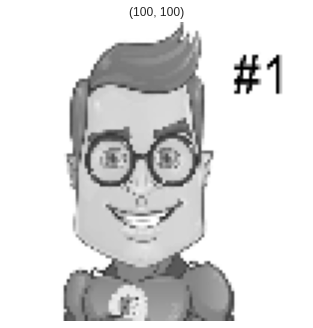

In [ ]:
img = cv2.imread('/sample_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
drawImg(img_gray)

In [ ]:
img.shape

(100, 100, 3)

In [ ]:
def convolution(img, img_filter):
  W = img.shape[0]
  H = img.shape[1]

  F = img_filter.shape[0] # 3X3 matrix
  conv_img = np.zeros((W-F+1,W-F+1)) #initialise the convolutioned feature matrix with zeroes

  for row in range(W-F+1):
     for col in range(W-F+1): 
       for i in range(F):
         for j in range(F):
           conv_img[row][col] += img[row+i][col+j]*img_filter[i][j]

           if conv_img[row][col] > 255:
             conv_img[row][col] = 255

           elif conv_img[row][col] < 0:
             conv_img[row][col] = 0

  return conv_img 

In [ ]:
blur_filter = np.ones((3,3))/9.0 
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

print(blur_filter)
print(edge_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


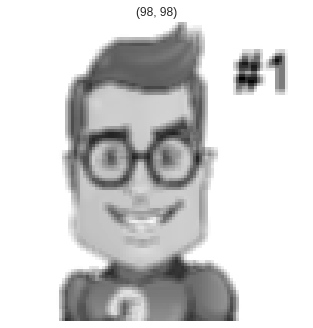

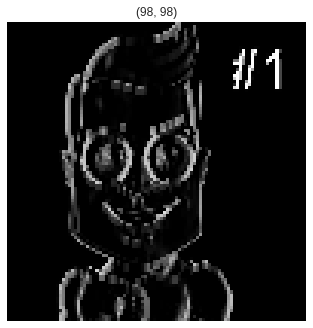

In [ ]:
output_blur = convolution(img_gray, blur_filter) # 98X98 matrix
output_edge = convolution(img_gray, edge_filter)
drawImg(output_blur)
drawImg(output_edge)

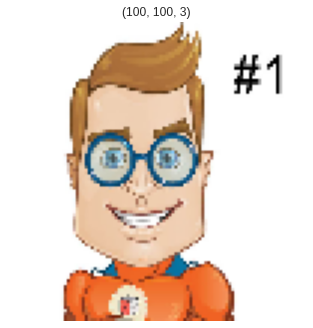

In [ ]:
img.shape
drawImg(img)

###Padding

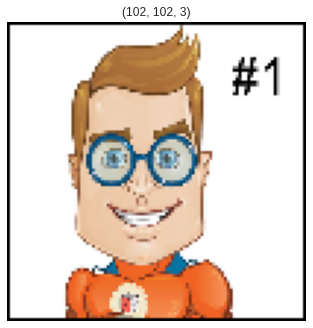

Output Image Size =  100


In [ ]:
pad_value = 1
pad_img = np.pad (img, ((pad_value,pad_value),(pad_value,pad_value),(0,0)),'constant',constant_values=0)
drawImg(pad_img)
output_size = img.shape[0] + (2*pad_value) - blur_filter.shape[0] + 1
print("Output Image Size = ", output_size)

###Pooling Implementation

In [42]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]]) #output from convolution layer

def pooling(X,mode="max"):
  window = 2
  stride = 2
  H,W = X.shape 


  OH = int((H-window)/stride) + 1 #sizes of the output of input and window
  OW = int((H-window)/stride) + 1

  output = np.zeros((OH,OW)) # initialisation of the output

  for r in range(OH):
    for c in range(OW):
      r_start = r*stride
      r_end = r_start + window
      c_start = c*stride 
      c_end = c_start + window 

      X_slice = X[r_start:r_end, c_start:c_end]

      if mode == "max":
        output[r][c] = np.max(X_slice)
      else:
        output[r][c] = np.mean(X_slice)

  return output

In [43]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
